In [2]:
#First of all, with Iris dataset

from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

poly = PolynomialFeatures(7)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LogisticRegression()
lr.fit(X_poly, y_train)
y_pred = lr.predict(X_test_poly)



c:\Users\adam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [9]:
from sklearn.datasets import make_moons
X1, Y1 = make_moons(n_samples = 1500, shuffle=True, noise=0.1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)

X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

lr.fit(X1_train_poly, y1_train)
lr.score(X1_test_poly, y1_test)

y1_pred = lr.predict(X1_test_poly)

cm1 = metrics.confusion_matrix(y1_test, y1_pred)
import seaborn as sns
print(cm1)
print(y1_pred)

[[153   0]
 [  0 147]]
[0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0
 1 0 0 1]


(-1.8187795121859816, 2.221220487814022)

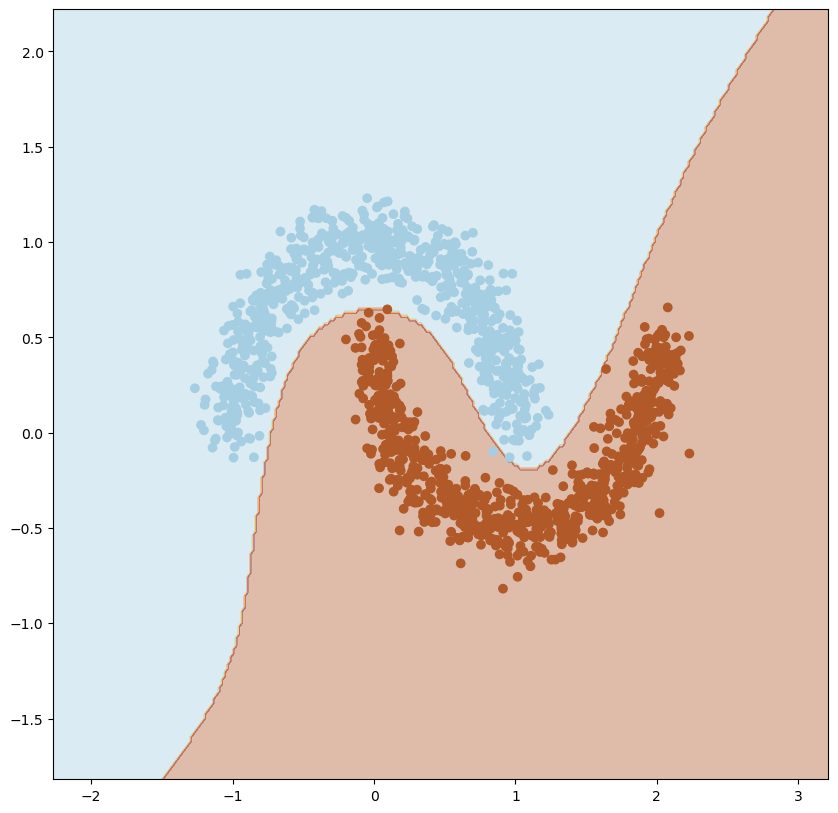

In [10]:
x_min, x_max = X1[:,0].min()-1, X1[:,0].max()+1
y_min, y_max = X1[:,1].min()-1, X1[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = lr.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()
plt.contourf(xx,yy, Z, alpha=0.4, cmap='Paired')

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap='Paired')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())



In [6]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       160

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

